In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('insurance.csv')


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

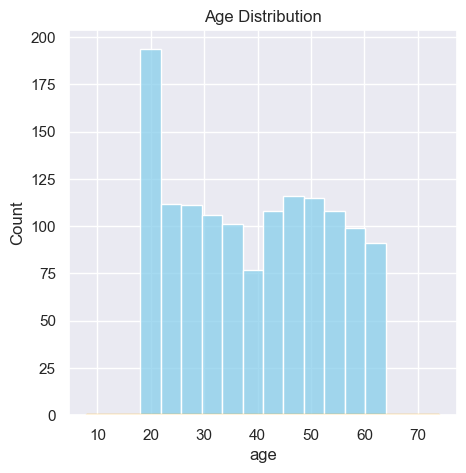

In [12]:
sns.set()

# Create a figure and axis
plt.figure(figsize=(5, 5))

# Plot the age distribution using histplot with different colors
sns.histplot(data['age'], color='skyblue')

# Add KDE plot with a different color
sns.kdeplot(data['age'], color='orange', lw=2)

# Set the title of the plot
plt.title('Age Distribution')

# Display the plot
plt.show()

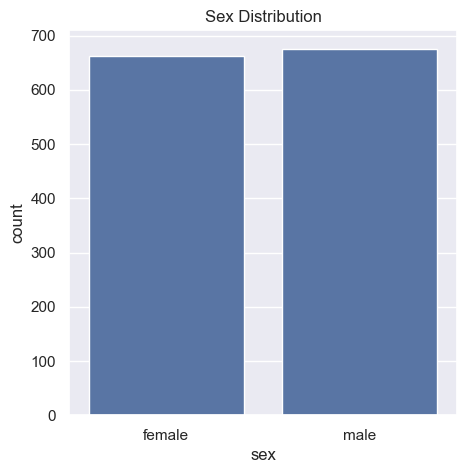

In [13]:
# Gender Column
palette={"male":"blue","female":"pink"}
plt.figure(figsize=(5,5))
sns.countplot(x="sex",data=data)
plt.title("Sex Distribution")
plt.show()

In [14]:
data.value_counts("sex")

sex
male      676
female    662
Name: count, dtype: int64

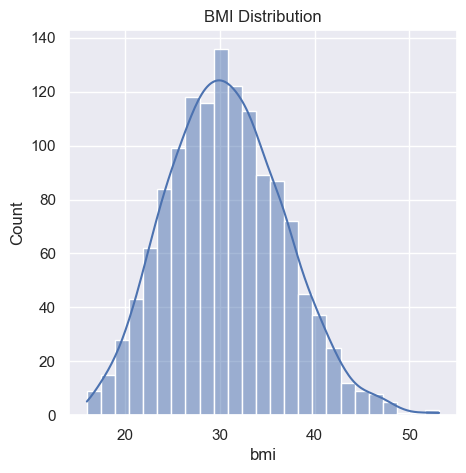

In [15]:
sns.set()

# Create a figure and axis
plt.figure(figsize=(5, 5))

# Plot the BMI distribution using histplot
sns.histplot(data['bmi'], kde=True)

# Set the title of the plot
plt.title('BMI Distribution')

# Display the plot
plt.show()

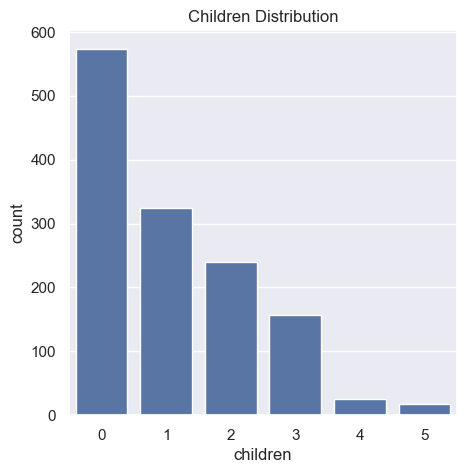

In [16]:
#children column
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=data)
plt.title("Children Distribution")
plt.show()

In [17]:
data.value_counts("children")

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

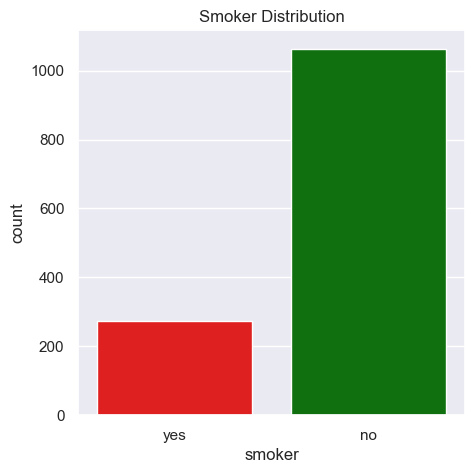

In [18]:
palette = {"yes": "red", "no": "green"}
# Create a figure and axis for the smoker distribution plot
plt.figure(figsize=(5, 5))
# Plot the smoker distribution using countplot with the updated parameters
sns.countplot(x='smoker', hue='smoker', data=data, palette=palette, dodge=False, legend=False)
# Set the title of the plot
plt.title("Smoker Distribution")
# Display the plot
plt.show()


In [19]:
data.value_counts("smoker")

smoker
no     1064
yes     274
Name: count, dtype: int64

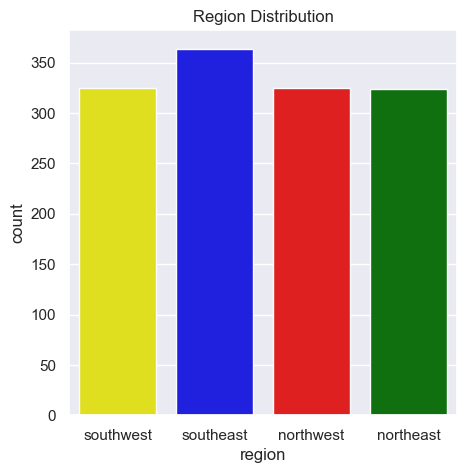

In [20]:
palette = {"northwest": "red", "northeast": "green", "southeast": "blue", "southwest": "yellow"}

# Create a figure and axis for the region distribution plot
plt.figure(figsize=(5, 5))

# Plot the region distribution using countplot with the updated parameters
sns.countplot(x="region", hue="region", data=data, palette=palette, dodge=False, legend=False)

# Set the title of the plot
plt.title("Region Distribution")

# Display the plot
plt.show()

In [21]:
data.value_counts("region")

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

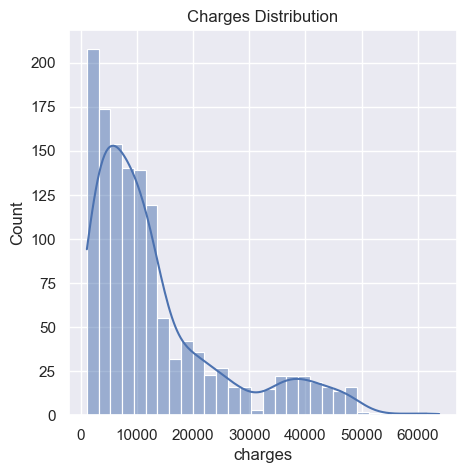

In [22]:
sns.set()

# Create a figure and axis for the charges distribution plot
plt.figure(figsize=(5, 5))

# Plot the charges distribution using histplot
sns.histplot(data["charges"], kde=True)

# Set the title of the plot
plt.title("Charges Distribution")

# Display the plot
plt.show()

In [23]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [25]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [27]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [30]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [31]:
x=data.drop(['charges'],axis=1)

In [32]:
y=data['charges']

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=500)

In [42]:
y_train

381     42303.69215
959     28468.91901
526     24059.68019
1016     2709.24395
1032     4137.52270
           ...     
287     14256.19280
957     12609.88702
273      9617.66245
951     47462.89400
858     18218.16139
Name: charges, Length: 1070, dtype: float64

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
lr =  LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state = 42)
gr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [49]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [50]:
df1

,Actual,Lr,svm,rf,gr
150,5125.21570,5349.883083,9536.151231,5971.797765,7076.438827
295,1704.56810,548.130731,9468.546321,1704.642282,3705.485259
532,12925.88600,13431.798391,9683.870846,14405.328439,16470.747003
282,4237.12655,5670.476273,9508.706267,5591.640227,6863.324001
1141,7954.51700,9959.516920,9576.375199,7890.668133,7637.776143
...,...,...,...,...,...
1103,11363.28320,14351.390043,9680.237167,11963.056137,12349.406759
812,11013.71190,9205.467148,9652.076232,15264.591461,13623.264988
1023,1711.02680,387.564639,9468.076292,3788.705532,4556.332675
199,14901.51670,17727.947742,9701.971597,14738.650804,14392.531658


In [52]:
import matplotlib.pyplot as plt

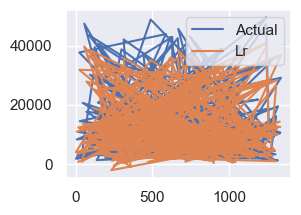

In [53]:
plt.subplot(221)
plt.plot(df1['Actual'],label='Actual')
plt.plot(df1['Lr'],label="Lr")
plt.legend()

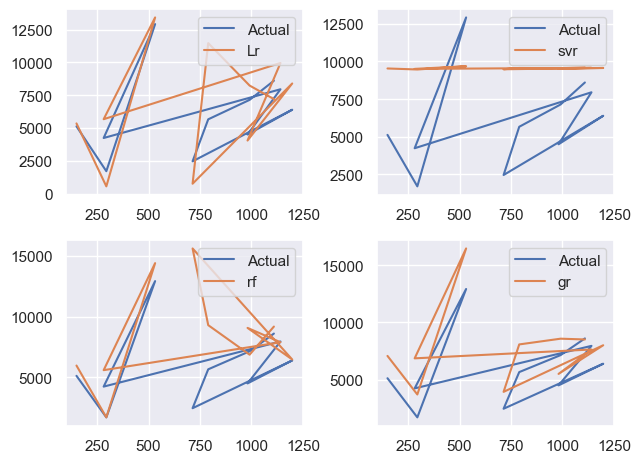

In [56]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()


In [57]:
from sklearn import metrics

In [58]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [59]:
print(score1,score2,score3,score4)

0.8055444747501129 -0.04873288230761941 0.866643326505747 0.9080906116884438


In [61]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [62]:
print(s1,s2,s3,s4)

3671.6534347243255 7997.761754300808 2621.895510581775 2241.768728706457


In [173]:
data = {'age':25,
        'sex':0,
        'bmi':25.0,
        'children':1,
        'smoker':1,
        'region':1}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,25,0,25.0,1,1,1


In [175]:
 new_data = gr.predict(df)
 print (new_data)

[17733.88768836]


In [177]:
gr = GradientBoostingRegressor()
gr.fit(x,y)

GradientBoostingRegressor()

In [179]:
import joblib

joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [181]:
model= joblib.load('model_joblib_gr')

In [183]:
model.predict(df)

array([17733.88768836])